In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import h3
import pandas as pd
import geopandas as gpd
import numpy as np
import folium
import osmnx as ox
from settings import *
import os
import iteration_utilities as iu
from typing import Any
from tqdm.auto import tqdm

In [3]:
tqdm.pandas()

In [29]:
place_name = 'Wrocław,Poland'

In [30]:
place = ox.geocode_to_gdf(place_name)

<AxesSubplot:>

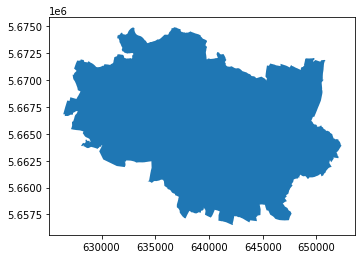

In [35]:
ox.project_gdf(place).plot()

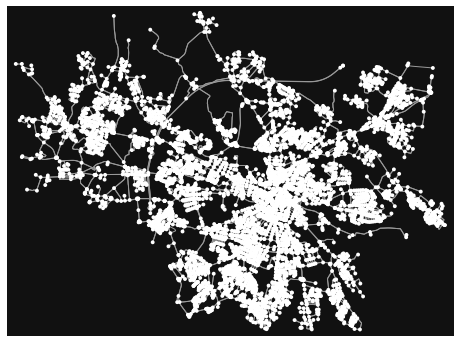

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [7]:
G = ox.graph_from_place(place_name, network_type='drive')
ox.plot_graph(G)

In [8]:
# G.edges(data=True)

In [9]:
ox.save_graph_shapefile(G, os.path.join(GENERATED_DATA_DIR, "wroclaw.shp"))

d:\Projekty\Programowanie\Studia\Semestr10\gis\osm-road-infrastructure\venv\lib\site-packages\osmnx\io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


In [23]:
wroclaw_shp = gpd.read_file(os.path.join(GENERATED_DATA_DIR, "wroclaw.shp", "edges.shp"))

In [11]:
# for col in wroclaw_shp:
#     v = wroclaw_shp[col].unique()
#     print(col, v)
#     print()

In [24]:
wroclaw_shp.to_file(os.path.join(GENERATED_DATA_DIR, "wroclaw.geojson"), driver="GeoJSON")

In [22]:
from src.tools.osmnx_utils import *



In [14]:
wroclaw_shp.reset_index(inplace=True)

In [25]:
wroclaw_shp.head(5)

,u,v,key,osmid,oneway,lanes,name,highway,maxspeed,length,from,to,ref,bridge,access,junction,width,tunnel,geometry
0,95584835,297779709,0,"[24707867, 656793686]",1,2,Bardzka,tertiary,50,178.450,95584835,297779709,None,None,None,None,None,None,"LINESTRING (17.04951 51.08311, 17.04947 51.083..."
1,95584835,241778108,0,"[656794402, 28458110]",1,2,Aleja Armii Krajowej,primary,50,28.882,95584835,241778108,94,None,None,None,None,None,"LINESTRING (17.04951 51.08311, 17.04933 51.083..."
2,95584835,95584852,0,"[301726798, 189513998, 301726791]",1,"['4', '3', '2']",Aleja Armii Krajowej,primary,50,284.438,95584852,95584835,94,None,None,None,None,None,"LINESTRING (17.05357 51.08301, 17.05335 51.082..."
3,95584835,3019848617,0,28458112,1,3,Bardzka,secondary,50,25.202,3019848617,95584835,395,None,None,None,None,None,"LINESTRING (17.04960 51.08289, 17.04957 51.082..."
4,95584841,164895026,0,27665976,0,None,Biskupa Bernarda Bogedaina,unclassified,None,14.714,164895026,95584841,None,None,None,None,None,None,"LINESTRING (17.06450 51.08460, 17.06437 51.08470)"


In [27]:
columns_to_explode = [
    "oneway",
    "lanes",
    "highway",
    "maxspeed",
    "bridge",
    "access",
    "junction",
    "width",
    "tunnel"
]
for col_expl in columns_to_explode:
    wroclaw_shp = wroclaw_shp.join(explode_and_pivot(wroclaw_shp, col_expl))

100%|██████████| 9683/9683 [00:00<00:00, 1079599.29it/s]


In [28]:
wroclaw_shp.columns

Index(['u', 'v', 'key', 'osmid', 'oneway', 'lanes', 'name', 'highway',
       'maxspeed', 'length', 'from', 'to', 'ref', 'bridge', 'access',
       'junction', 'width', 'tunnel', 'geometry', 'oneway_new', 'oneway-0',
       'oneway-1', 'lanes_new', 'lanes-1', 'lanes-2', 'lanes-3', 'lanes-4',
       'lanes-5', 'lanes-6', 'lanes-7', 'lanes-None', 'highway_new',
       'highway-living_street', 'highway-motorway', 'highway-motorway_link',
       'highway-primary', 'highway-primary_link', 'highway-residential',
       'highway-secondary', 'highway-secondary_link', 'highway-tertiary',
       'highway-tertiary_link', 'highway-trunk', 'highway-trunk_link',
       'highway-unclassified', 'maxspeed_new', 'maxspeed-10', 'maxspeed-100',
       'maxspeed-110', 'maxspeed-120', 'maxspeed-15', 'maxspeed-20',
       'maxspeed-30', 'maxspeed-40', 'maxspeed-50', 'maxspeed-60',
       'maxspeed-70', 'maxspeed-80', 'maxspeed-90', 'maxspeed-None',
       'bridge_new', 'bridge-None', 'bridge-viaduct', 'bridg

In [19]:
wroclaw_shp

,index,u,v,key,osmid,oneway,lanes,name,highway,maxspeed,...,width-2.5,width-3,width-4,width-4.5,width-6,width-None,tunnel_new,tunnel-None,tunnel-building_passage,tunnel-yes
0,0,95584835,297779709,0,"[24707867, 656793686]",1,2,Bardzka,tertiary,50,...,0,0,0,0,0,1,[None],1,0,0
1,1,95584835,241778108,0,"[656794402, 28458110]",1,2,Aleja Armii Krajowej,primary,50,...,0,0,0,0,0,1,[None],1,0,0
2,2,95584835,95584852,0,"[301726798, 189513998, 301726791]",1,"['4', '3', '2']",Aleja Armii Krajowej,primary,50,...,0,0,0,0,0,1,[None],1,0,0
3,3,95584835,3019848617,0,28458112,1,3,Bardzka,secondary,50,...,0,0,0,0,0,1,[None],1,0,0
4,4,95584841,164895026,0,27665976,0,None,Biskupa Bernarda Bogedaina,unclassified,None,...,0,0,0,0,0,1,[None],1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9678,9678,8001157238,8221846043,0,"[884068441, 769929444, 727134918, 508232269, 7...",1,3,Nabycińska,tertiary,None,...,0,0,0,0,0,1,[None],1,0,0
9679,9679,8001157238,8001157243,0,858291159,1,1,None,tertiary_link,None,...,0,0,0,0,0,1,[None],1,0,0
9680,9680,8150476313,8150476314,0,875668659,0,None,None,living_street,20,...,0,0,0,0,0,1,[None],1,0,0
9681,9681,8570024805,8570024807,0,"[923192968, 923192971]",0,None,None,living_street,20,...,0,0,0,0,0,1,[None],1,0,0


In [20]:
place

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((16.80734 51.13895, 16.80859 51.13887...",51.21006,51.042669,17.176219,16.807339,258844163,relation,2805691,51.126311,16.978196,"Wrocław, Wrocław County, Lower Silesian Voivod...",boundary,administrative,0.88475


In [ ]:
a = ox.geometries_from_place(place_name, tags={"highway": True, "building": True})

ReadTimeout: HTTPConnectionPool(host='overpass-api.de', port=80): Read timed out. (read timeout=180)

KeyboardInterrupt: 

ReadTimeout: HTTPConnectionPool(host='overpass-api.de', port=80): Read timed out. (read timeout=180)